In [1]:
import tensorflow as tf
from tensorflow import keras
import PIL
import numpy as np
import cv2
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)
data_dir

228813984/228813984 [==============================] - 1s 0us/step


'./datasets/flower_photos'

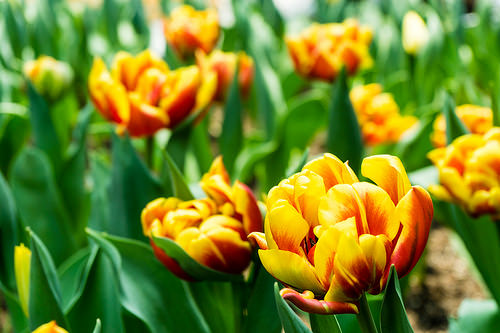

In [3]:
PIL.Image.open('/kaggle/working/datasets/flower_photos/tulips/16265876844_0a149c4f76.jpg')

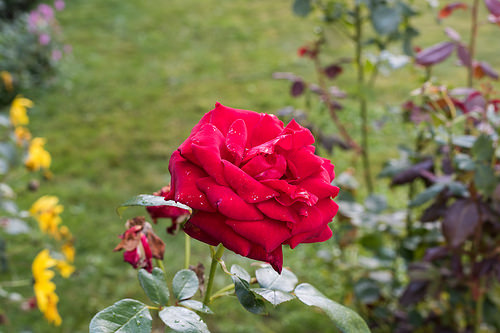

In [4]:
PIL.Image.open('/kaggle/working/datasets/flower_photos/roses/15011625580_7974c44bce.jpg')

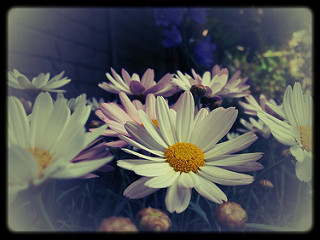

In [5]:
PIL.Image.open('/kaggle/working/datasets/flower_photos/daisy/7189043225_2fe781439a_n.jpg')

In [6]:
import pathlib

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [9]:
roses = list(data_dir.glob('roses/*'))
len(roses)

641

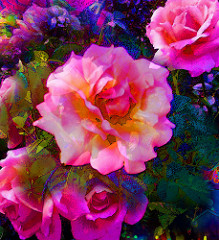

In [10]:
PIL.Image.open(roses[0])

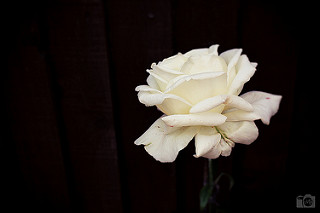

In [11]:
PIL.Image.open(roses[1])

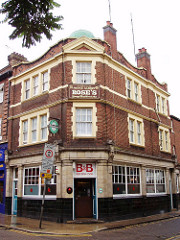

In [12]:
PIL.Image.open(roses[2])

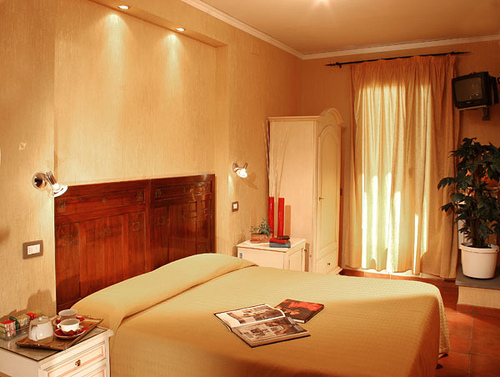

In [13]:
PIL.Image.open(roses[4])

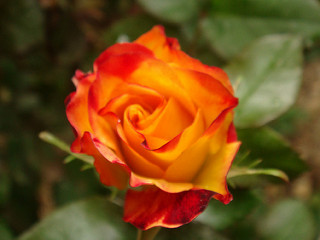

In [14]:
PIL.Image.open(roses[19])

In [15]:
flower_images_dict = {
    'tulips': list(data_dir.glob('tulips/*')),
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
}

In [16]:
flower_images_dict['tulips'][:5]

[PosixPath('datasets/flower_photos/tulips/5574219476_1f46775487_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8838975946_f54194894e_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/17324469461_2b318aff8d_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/142235017_07816937c6.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087439392_969444f56e.jpg')]

In [17]:
flowers_labels_dict = {
    'tulips': 0,
    'roses': 1,
    'daisy': 2,
    'sunflowers': 3,
    'dandelion': 4
}

In [18]:
img = cv2.imread(str(flower_images_dict['roses'][0]))

In [19]:
img

array([[[171,  39,  79],
        [121,   0, 233],
        [129,   0, 179],
        ...,
        [228, 164, 246],
        [195,  95, 215],
        [ 71,   0,  75]],

       [[148,  14,  74],
        [184,  22,  94],
        [147,  11, 193],
        ...,
        [231, 162, 243],
        [222, 116, 236],
        [112,  22, 112]],

       [[186,  46,  83],
        [127,  20,  46],
        [177,   4, 180],
        ...,
        [220, 111, 243],
        [233,  86, 254],
        [195,  59, 207]],

       ...,

       [[ 42,  51,  41],
        [ 35,  44,  34],
        [  0,   4,   0],
        ...,
        [ 42,   4,  16],
        [ 41,   0,  16],
        [ 49,   3,  26]],

       [[ 98,  99,  97],
        [  1,   4,   2],
        [  0,   5,   3],
        ...,
        [ 36,   4,  21],
        [ 32,   0,  20],
        [ 39,   2,  28]],

       [[ 27,  20,  27],
        [  4,   3,   5],
        [  0,   1,   2],
        ...,
        [ 18,   2,  25],
        [ 16,   0,  24],
        [ 23,   1,  30]]

In [20]:
img.shape

(240, 219, 3)

In [21]:
img = cv2.resize(img, (180, 180))
img.shape

(180, 180, 3)

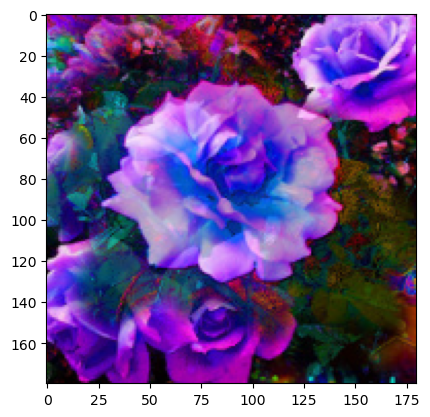

In [22]:
plt.imshow(img)

In [23]:
x = []
y = []

for name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180, 180))
        x.append(resized_img)
        y.append(flowers_labels_dict[name])

In [24]:
y[:5]

[0, 0, 0, 0, 0]

In [25]:
x = np.array(x)
y = np.array(y)

In [26]:
x = x / 255

In [27]:
x[0]

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.06666667, 0.06666667, 0.06666667],
        [0.07058824, 0.07058824, 0.07058824]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.05882353, 0.05882353, 0.05882353],
        [0.05882353, 0.05882353, 0.05882353],
        [0.0627451 , 0.0627451 , 0.0627451 ]],

       [[0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        ...,
        [0.05490196, 0.05490196, 0.05490196],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05882353, 0.05882353, 0.05882353]],

       ...,

       [[0.12156863, 0.12156863, 0.12156863],
        [0.10588235, 0.10588235, 0.10588235],
        [0.14509804, 0

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify = y)

In [29]:
len(x)

3670

In [30]:
len(x_train)

2936

In [31]:
len(x_test)

734

In [32]:
y_train[:10]

array([0, 1, 4, 0, 0, 3, 4, 1, 3, 0])

In [33]:
y_train[:20]

array([0, 1, 4, 0, 0, 3, 4, 1, 3, 0, 2, 4, 0, 0, 0, 0, 4, 4, 1, 3])

In [34]:
y_test[:20]

array([3, 3, 4, 4, 0, 3, 3, 2, 4, 1, 1, 4, 3, 3, 3, 3, 4, 0, 4, 0])

In [35]:
x_train.shape

(2936, 180, 180, 3)

In [36]:
cnn1 = keras.Sequential([
    keras.layers.Conv2D(16, 3, activation = 'relu', padding = 'same', input_shape = (180, 180, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(32, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
])

cnn1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [37]:
cnn1.fit(x_train, y_train, epochs = 30)

Epoch 1/30
92/92 [==============================] - 12s 24ms/step - loss: 1.3410 - accuracy: 0.4210
Epoch 2/30
92/92 [==============================] - 2s 20ms/step - loss: 0.9892 - accuracy: 0.6093
Epoch 3/30
92/92 [==============================] - 2s 21ms/step - loss: 0.8003 - accuracy: 0.6863
Epoch 4/30
92/92 [==============================] - 2s 20ms/step - loss: 0.5976 - accuracy: 0.7691
Epoch 5/30
92/92 [==============================] - 2s 20ms/step - loss: 0.4097 - accuracy: 0.8495
Epoch 6/30
92/92 [==============================] - 2s 20ms/step - loss: 0.2431 - accuracy: 0.9210
Epoch 7/30
92/92 [==============================] - 2s 20ms/step - loss: 0.1379 - accuracy: 0.9625
Epoch 8/30
92/92 [==============================] - 2s 20ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 9/30
92/92 [==============================] - 2s 20ms/step - loss: 0.0669 - accuracy: 0.9847
Epoch 10/30
92/92 [==============================] - 2s 20ms/step - loss: 0.0330 - accuracy: 0.9911
Epoch 11

In [38]:
cnn1.evaluate(x_test, y_test)

23/23 [==============================] - 1s 22ms/step - loss: 2.4072 - accuracy: 0.6567


[2.4072036743164062, 0.6566757559776306]

In [39]:
y_pred1 = cnn1.predict(x_test)
y_pred1 = [np.argmax(i) for i in y_pred1]
y_pred1[:5]

23/23 [==============================] - 0s 9ms/step


[3, 4, 4, 4, 0]

In [40]:
y_test[:5]

array([3, 3, 4, 4, 0])

**To reduce overfitting adding layers of data_augmentation**

In [41]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

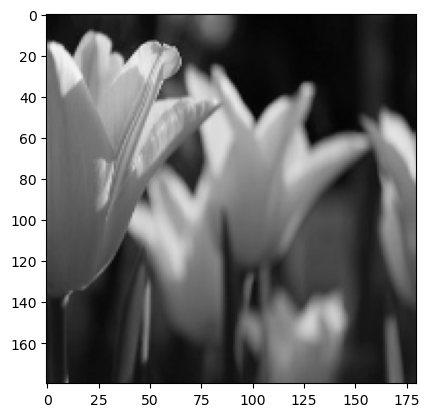

In [42]:
plt.imshow(x[0])

In [43]:
aug_data = data_augmentation(x)

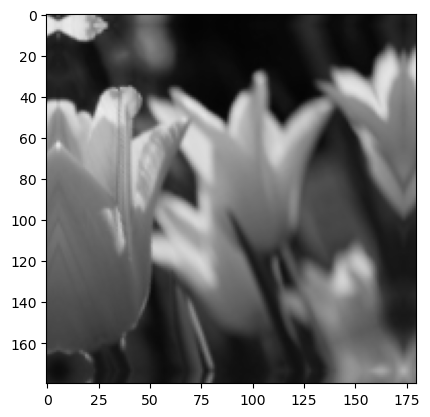

In [44]:
plt.imshow(aug_data[0])

In [47]:
cnn2  = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(32, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5, activation = 'sigmoid')
    
])

cnn2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
cnn2.fit(x_train, y_train, epochs = 30)

Epoch 1/30


2023-07-06 06:49:03.145866: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


92/92 [==============================] - 5s 30ms/step - loss: 1.3051 - accuracy: 0.4397
Epoch 2/30
92/92 [==============================] - 3s 29ms/step - loss: 1.0304 - accuracy: 0.5872
Epoch 3/30
92/92 [==============================] - 3s 30ms/step - loss: 0.9260 - accuracy: 0.6301
Epoch 4/30
92/92 [==============================] - 3s 29ms/step - loss: 0.8649 - accuracy: 0.6706
Epoch 5/30
92/92 [==============================] - 3s 30ms/step - loss: 0.8039 - accuracy: 0.6856
Epoch 6/30
92/92 [==============================] - 3s 29ms/step - loss: 0.7942 - accuracy: 0.7047
Epoch 7/30
92/92 [==============================] - 3s 29ms/step - loss: 0.7500 - accuracy: 0.7125
Epoch 8/30
92/92 [==============================] - 3s 29ms/step - loss: 0.6932 - accuracy: 0.7299
Epoch 9/30
92/92 [==============================] - 3s 30ms/step - loss: 0.6732 - accuracy: 0.7394
Epoch 10/30
92/92 [==============================] - 3s 29ms/step - loss: 0.6480 - accuracy: 0.7493
Epoch 11/30
92/92 [=

In [49]:
cnn2.evaluate(x_test, y_test)

23/23 [==============================] - 0s 12ms/step - loss: 0.8885 - accuracy: 0.7262


[0.8885197639465332, 0.7261580228805542]